In [1]:
import pandas as pd

import re

dataset = pd.read_csv('fixed_spam_cleaned.csv')
dataset.head(30)




,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [2]:
dataset.shape

(5572, 2)

In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("writing")

'write'

In [5]:
token= word_tokenize("HELLO!! I am Vansh Pratap Singh, re416")
print(token)

['HELLO', '!', '!', 'I', 'am', 'Vansh', 'Pratap', 'Singh', ',', 're416']


In [6]:
# Cleaning function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords (optional)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning
dataset['Clean_Message'] = dataset['Message'].apply(clean_text)
dataset.head(30)

,Label,Message,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling weeks word back id like fu...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile months u r entitled update latest colou...


In [7]:
output_data = dataset["Label"]
print(output_data)


0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object


In [8]:
input_data = dataset["Message"]
print(input_data)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [9]:
from sklearn.preprocessing import LabelEncoder
te = LabelEncoder()
try:
    dataset['Encoded_Message'] = te.fit_transform(dataset['Clean_Message'])
except Exception as e:
    print("Encoding error:", e)

le = LabelEncoder()
dataset['Label_encoded'] = le.fit_transform(dataset['Label'])

print(dataset.head(4000))


     Label                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
3995   ham  We'll you pay over like  &lt;#&gt; yrs so its ...   
3996  spam  Bored housewives! Chat n date now! 0871750.77....   
3997  spam  We tried to call you re your reply to our sms ...   
3998   ham                  K...k...when will you give treat?   
3999  spam  This is the 2nd time we have tried to contact ...   

                                          Clean_Message  Encoded_Message  \
0     go jurong point crazy available bugis n great ...             1192   
1                               ok lar joking wif u oni            

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned text
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(dataset['Clean_Message'])


In [11]:
# Target labels
y = dataset['Label_encoded']

In [12]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
nb_preds = nb_model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

print("=== Naive Bayes Results ===")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

=== Naive Bayes Results ===
Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.87      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [15]:
def predict_spam(message):
    message = clean_text(message)
    message_count = vectorizer.transform([message])
    prediction = model.predict(message_count)

    if prediction[0] == 1:
        return 1
    else:
        return 0


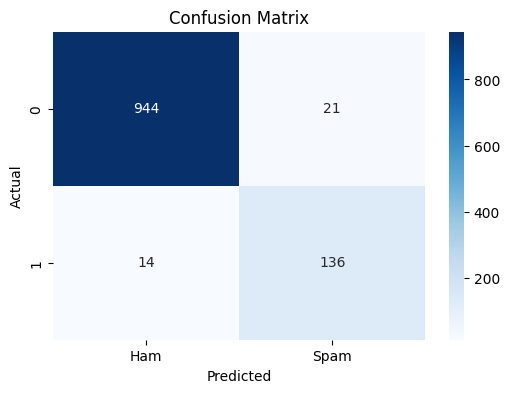

Confusion Matrix:
 [[944  21]
 [ 14 136]]


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, nb_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt ='d', cmap ='Blues', xticklabels=['Ham','Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))


In [ ]:

import joblib

# Suppose your trained model is named 'model' and your vectorizer is named 'vectorizer'
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
